In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

Matplotlib is building the font cache; this may take a moment.
/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,0.000287,0.002015,0.018361,0.000991,0.004577,0.001189,...,0.000757,0.001988,0.000562,0.000851,0.000615,0.000556,0.000531,0.000268,0.001002,0.004303
1,M4RandomForestRegressor,256,18,shap,0.000317,0.001942,0.012493,0.011043,0.004097,0.000878,...,0.001728,0.001991,0.000624,0.000698,0.000620,0.001001,0.000437,0.000242,0.001335,0.003058
2,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4XGBRegressor,Theta,12,shap,0.000323,0.004803,0.021700,0.005030,0.010489,0.003052,...,0.001464,0.002437,0.000644,0.001199,0.000615,0.000623,0.001130,0.000292,0.004180,0.004436
4,M4XGBRegressor,078,15,shap,0.000292,0.003989,0.016970,0.004807,0.007605,0.002599,...,0.001631,0.002586,0.002034,0.000746,0.000962,0.000693,0.000944,0.000313,0.001133,0.004712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
29276,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29277,M4XGBRegressor,219,12,shap,0.000586,0.003147,0.021873,0.015610,0.003692,0.006103,...,0.001454,0.004581,0.002105,0.001643,0.001271,0.000663,0.001361,0.000529,0.003244,0.004665
29278,M4DummyMeanRegression,126,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
figures_directory = 'figures'

In [4]:
df['ml_algorithm'].unique()

array(['M4RandomForestSingleOutputRegressor', 'M4RandomForestRegressor',
       'M4DummyMeanRegression', 'M4XGBRegressor',
       'M4KerasNetRegressionModel'], dtype=object)

In [5]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [6]:
#feature_columns

In [7]:
#feature_columns
#df.iloc[0][feature_columns].sort_values()

In [8]:
#df[feature_columns].rank(axis=1)

In [9]:
dfr = feature_importance_to_feature_rank(df, feature_columns)

In [10]:
gdfr = dfr.groupby(['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm']).mean().reset_index()

In [11]:
gdfr

,feature_importance_method,forecasting_algorithm,ml_algorithm,run,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,permutation,005,M4DummyMeanRegression,15.5,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
1,permutation,005,M4KerasNetRegressionModel,15.5,15.100000,47.466667,62.000000,51.133333,63.000000,60.400000,...,41.000000,39.233333,27.933333,29.900000,22.166667,31.266667,28.300000,31.333333,51.966667,54.533333
2,permutation,005,M4RandomForestRegressor,15.5,12.366667,45.600000,62.033333,55.166667,56.466667,41.600000,...,50.033333,59.033333,23.600000,24.633333,22.100000,35.033333,19.766667,10.533333,41.666667,52.666667
3,permutation,005,M4RandomForestSingleOutputRegressor,15.5,14.666667,49.533333,62.033333,50.166667,55.933333,42.633333,...,43.366667,53.033333,23.733333,25.933333,21.966667,21.633333,36.900000,9.300000,30.100000,54.133333
4,permutation,005,M4XGBRegressor,15.5,10.000000,57.000000,63.000000,59.233333,56.733333,46.200000,...,39.366667,48.933333,22.233333,34.000000,25.000000,15.433333,27.366667,12.916667,43.100000,51.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,xgboost-weight,Naive2,M4XGBRegressor,15.5,18.333333,63.000000,62.000000,59.016667,56.300000,55.500000,...,52.366667,60.250000,28.950000,27.350000,25.116667,21.383333,21.900000,13.916667,27.050000,43.833333
972,xgboost-weight,RNN,M4XGBRegressor,15.5,18.050000,62.166667,61.783333,50.883333,58.733333,54.533333,...,56.616667,62.050000,29.900000,30.950000,27.050000,22.866667,20.383333,11.300000,24.216667,37.133333
973,xgboost-weight,SES,M4XGBRegressor,15.5,18.283333,63.000000,62.000000,59.866667,56.916667,55.783333,...,53.533333,60.833333,29.033333,27.016667,24.950000,20.716667,21.283333,12.833333,27.800000,43.150000
974,xgboost-weight,Theta,M4XGBRegressor,15.5,18.216667,63.000000,62.000000,59.416667,56.583333,54.733333,...,55.816667,61.000000,28.300000,27.600000,26.883333,21.650000,21.433333,12.283333,27.450000,44.633333


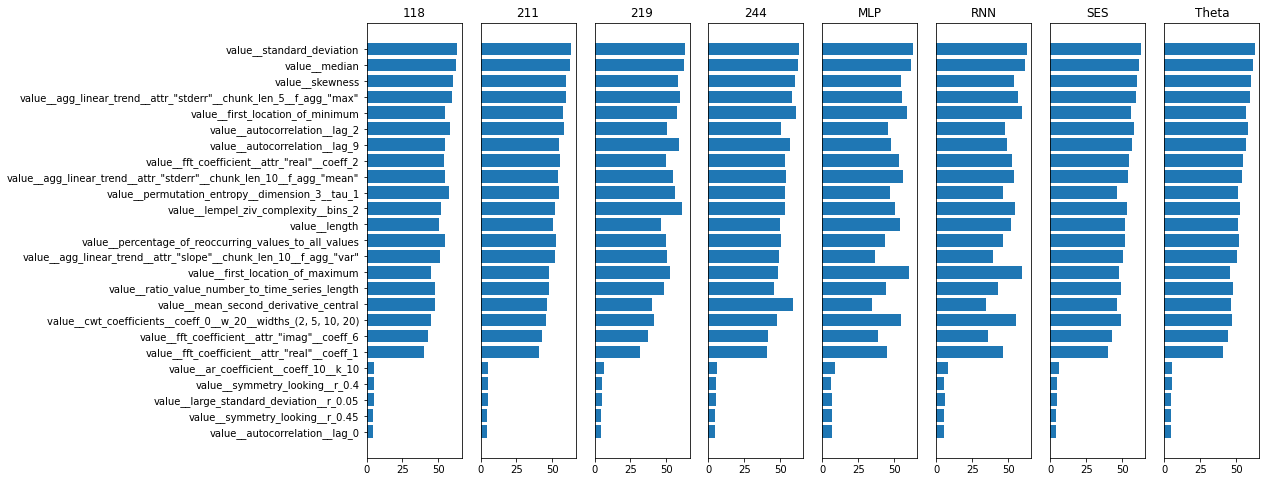

In [12]:
l = gdfr.query('ml_algorithm == "M4KerasNetRegressionModel" and feature_importance_method == "permutation"')[['forecasting_algorithm'] + feature_columns]
ls = l[l['forecasting_algorithm'].isin(['SES', 'RNN', 'Theta', 'MLP', '118', '219', '211', '244'])]

sorted_features = l[feature_columns].mean(axis=0).sort_values(ascending=False)
best_features = list(reversed(list(sorted_features.head(20).keys()) + list(sorted_features.tail(5).keys())))

fig, axes = plt.subplots(1, len(ls), figsize=(16, 8))

for i, (index, row) in enumerate(ls.iterrows()):
    forecast_name = row['forecasting_algorithm']
    feature_list, ranking_list = best_features, [row[x] for x in best_features]
    axes[i].barh(feature_list, ranking_list)
    axes[i].set_title(forecast_name)
    if i>0:
        axes[i].get_yaxis().set_visible(False)

In [13]:
l

,forecasting_algorithm,"value__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","value__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","value__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""",value__ar_coefficient__coeff_10__k_10,"value__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""","value__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC""",value__autocorrelation__lag_0,value__autocorrelation__lag_2,value__autocorrelation__lag_9,...,value__spkt_welch_density__coeff_5,value__standard_deviation,value__sum_of_reoccurring_data_points,value__symmetry_looking__r_0.05,value__symmetry_looking__r_0.1,value__symmetry_looking__r_0.15000000000000002,value__symmetry_looking__r_0.2,value__symmetry_looking__r_0.30000000000000004,value__symmetry_looking__r_0.4,value__symmetry_looking__r_0.45
1,005,51.166667,53.700000,59.400000,6.700000,13.300000,32.000000,4.583333,57.900000,56.633333,...,17.933333,63.0,38.400000,35.400000,33.100000,27.200000,18.833333,7.733333,4.633333,4.633333
6,009,50.200000,51.866667,57.966667,5.900000,12.566667,38.033333,4.250000,56.800000,53.600000,...,16.766667,63.0,40.833333,32.466667,31.466667,26.900000,20.200000,7.766667,4.700000,4.333333
11,024,50.733333,54.600000,59.933333,6.733333,14.533333,33.000000,4.716667,55.566667,55.033333,...,18.733333,63.0,37.300000,34.366667,32.000000,27.200000,19.100000,7.700000,5.000000,4.666667
16,030,51.200000,53.866667,59.900000,6.366667,13.333333,34.433333,5.150000,54.433333,55.400000,...,17.800000,63.0,36.666667,34.666667,34.700000,29.100000,20.000000,7.966667,5.800000,5.200000
21,036,51.866667,54.066667,59.666667,6.366667,13.366667,34.300000,4.816667,57.733333,54.233333,...,18.233333,63.0,38.600000,35.233333,33.433333,28.033333,19.433333,8.766667,4.866667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Naive2,50.266667,54.000000,58.633333,6.133333,13.133333,33.600000,4.216667,60.333333,57.066667,...,17.233333,63.0,39.233333,34.433333,33.100000,27.433333,19.266667,8.233333,4.866667,4.300000
286,RNN,39.233333,54.300000,56.800000,8.033333,13.266667,26.366667,5.416667,47.633333,49.433333,...,16.066667,63.0,41.000000,34.600000,32.500000,28.833333,19.666667,9.766667,5.233333,5.466667
291,SES,50.600000,54.333333,59.500000,5.766667,13.300000,31.466667,4.116667,58.400000,57.100000,...,18.000000,63.0,39.066667,35.066667,32.833333,26.900000,19.100000,8.000000,4.900000,4.166667
296,Theta,50.900000,54.233333,59.533333,5.266667,13.100000,31.433333,4.350000,58.266667,56.533333,...,17.800000,63.0,38.033333,35.266667,33.233333,27.066667,17.600000,7.500000,5.033333,4.400000


In [14]:
from collections import defaultdict

pair_feature_dict = defaultdict(lambda: [])

for index, row in dfr.iterrows():
    keep_columns = set(row[feature_columns].sample(frac=1).sort_values(ascending=False).head(15).keys())
    key = (row['forecasting_algorithm'], row['ml_algorithm'], row['feature_importance_method'])
    pair_feature_dict[key].append(keep_columns)

In [15]:
def list_pairs_average_matches(l1, l2):
    int_sum = 0
    int_pairs = 0
    for a in l1:
        for b in l2:
            intr = a.intersection(b)
            int_sum+=len(intr)
            int_pairs+=1
    return int_sum/int_pairs

def get_coocurence_matrix(keys_list, d):
    X = np.zeros((len(keys_list), len(keys_list)))
    
    for i, i1 in enumerate(keys_list):
        for j, i2 in enumerate(keys_list):
            sim = list_pairs_average_matches(d[i1], d[i2])
            X[i, j] = sim
    return X

def label_keys(v):
    return [label_key(x) for x in v]

def label_key(k):
    return "-".join(list(k)) 

In [16]:
dfr.groupby(['ml_algorithm', 'feature_importance_method', 'forecasting_algorithm']).size().reset_index()

,ml_algorithm,feature_importance_method,forecasting_algorithm,0
0,M4DummyMeanRegression,permutation,005,30
1,M4DummyMeanRegression,permutation,009,30
2,M4DummyMeanRegression,permutation,024,30
3,M4DummyMeanRegression,permutation,030,30
4,M4DummyMeanRegression,permutation,036,30
...,...,...,...,...
971,M4XGBRegressor,xgboost-weight,Naive2,30
972,M4XGBRegressor,xgboost-weight,RNN,30
973,M4XGBRegressor,xgboost-weight,SES,30
974,M4XGBRegressor,xgboost-weight,Theta,30


In [17]:
all_keys = []

for index, row in dfr.groupby(['ml_algorithm', 'feature_importance_method', 'forecasting_algorithm']).size().reset_index().iterrows():
    key = (row['forecasting_algorithm'], row['ml_algorithm'], row['feature_importance_method'])
    all_keys.append(key)

In [18]:
def sort_corr(df):
    c = sorted(df.columns)
    
    c = ['P/Mean', 'S/Mean', 'P/NN', 'S/NN', 'P/RF', 'S/RF', 'P/SRF', 'P/XGB' , 'S/XGB', 'TC/XGB', 'TG/XGB', 'W/XGB', 'C/XGB', 'G/XGB', 'RF/SRF']
    
    print(c)
    print(df)
    dfn = df[c].loc[c]
    return dfn

In [19]:
Theta_keys = [
 ('Theta', 'M4DummyMeanRegression', 'permutation'),
 ('Theta', 'M4DummyMeanRegression', 'shap'),
 ('Theta', 'M4KerasNetRegressionModel', 'permutation'),
 ('Theta', 'M4KerasNetRegressionModel', 'shap'),
 ('Theta', 'M4XGBRegressor', 'permutation'),
 ('Theta', 'M4XGBRegressor', 'shap'),
 ('Theta', 'M4RandomForestRegressor', 'permutation'),
 ('Theta', 'M4RandomForestRegressor', 'shap'),
 ('Theta', 'M4RandomForestSingleOutputRegressor', 'permutation'),
 ('Theta', 'M4RandomForestSingleOutputRegressor', 'shap'),
 ('Theta', 'M4XGBRegressor', 'xgboost-cover'),
 ('Theta', 'M4XGBRegressor', 'xgboost-gain'),
 ('Theta', 'M4XGBRegressor', 'xgboost-weight'),
 ('Theta', 'M4XGBRegressor', 'xgboost-total_gain'),
 ('Theta', 'M4XGBRegressor', 'xgboost-total_cover'),
 ('Theta', 'M4RandomForestSingleOutputRegressor', 'randomforest'),
]

In [20]:
algo = Theta_keys[0][0]

map_keys = get_meta_importance_name_pair_map()
X = get_coocurence_matrix(Theta_keys, pair_feature_dict)

keys = [x[1:] for x in Theta_keys]
d = {map_keys[k[0] + ',' + k[1]]: X[i, :] for i, k in enumerate(keys)}
d['index'] = [map_keys[k[0] + ',' + k[1]] for k in keys]
cdf = pd.DataFrame(d)
cdf = cdf.set_index('index')

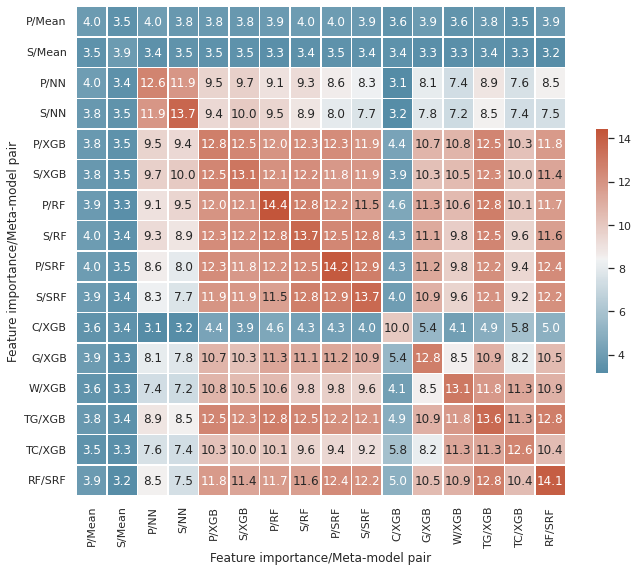

In [21]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(cdf, square=True, cmap=cmap, center=np.mean(X), linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')
plt.xlabel('Feature importance/Meta-model pair')
plt.ylabel('Feature importance/Meta-model pair')
plt.savefig(f'{figures_directory}/feature_agreement_top_15_{algo}.pdf', bbox_inches='tight', pad_inches=0)

In [22]:
ARIMA_keys = [
 ('ARIMA', 'M4DummyMeanRegression', 'permutation'),
 ('ARIMA', 'M4DummyMeanRegression', 'shap'),
 ('ARIMA', 'M4KerasNetRegressionModel', 'permutation'),
 ('ARIMA', 'M4KerasNetRegressionModel', 'shap'),
 ('ARIMA', 'M4XGBRegressor', 'permutation'),
 ('ARIMA', 'M4XGBRegressor', 'shap'),
 ('ARIMA', 'M4RandomForestRegressor', 'permutation'),
 ('ARIMA', 'M4RandomForestRegressor', 'shap'),
 ('ARIMA', 'M4RandomForestSingleOutputRegressor', 'permutation'),
 ('ARIMA', 'M4RandomForestSingleOutputRegressor', 'shap'),
 ('ARIMA', 'M4XGBRegressor', 'xgboost-cover'),
 ('ARIMA', 'M4XGBRegressor', 'xgboost-gain'),
 ('ARIMA', 'M4XGBRegressor', 'xgboost-weight'),
 ('ARIMA', 'M4XGBRegressor', 'xgboost-total_gain'),
 ('ARIMA', 'M4XGBRegressor', 'xgboost-total_cover'),
 ('ARIMA', 'M4RandomForestSingleOutputRegressor', 'randomforest'),
]

In [23]:
algo = ARIMA_keys[0][0]

map_keys = get_meta_importance_name_pair_map()
X = get_coocurence_matrix(ARIMA_keys, pair_feature_dict)

keys = [x[1:] for x in ARIMA_keys]

d = {map_keys[k[0] + ',' + k[1]]: X[i, :] for i, k in enumerate(keys)}
d['index'] = [map_keys[k[0] + ',' + k[1]] for k in keys]

#d = {k: X[i, :] for i, k in enumerate(keys)}
#d['index'] = keys
cdf = pd.DataFrame(d)
cdf = cdf.set_index('index')

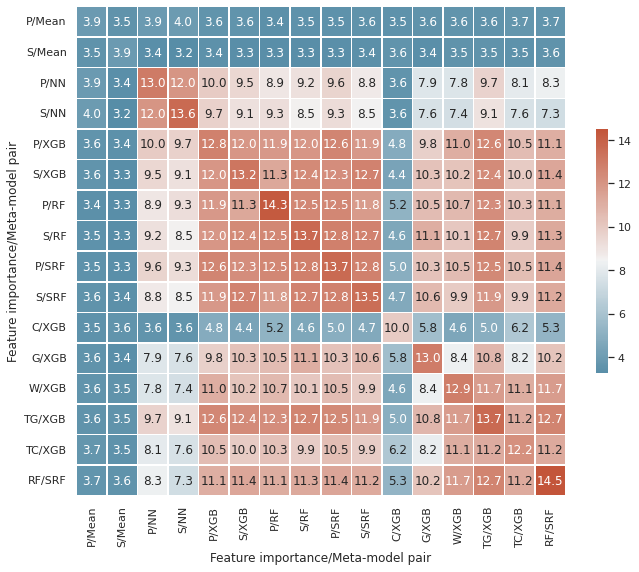

In [24]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

#cdf = sort_corr(cdf)

sns.heatmap(cdf, square=True, cmap=cmap, center=np.mean(X), linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')
plt.xlabel('Feature importance/Meta-model pair')
plt.ylabel('Feature importance/Meta-model pair')
plt.savefig(f'{figures_directory}/feature_agreement_top_15_{algo}.pdf', bbox_inches='tight', pad_inches=0)

In [25]:
from tqdm import tqdm

all_fa = set([x[0] for x in all_keys])

dict_sum = {}
dict_count = {}

for algo in tqdm(all_fa):
    #print(algo)
    keys = set([x for x in all_keys if x[0]==algo])
    X = get_coocurence_matrix(keys, pair_feature_dict)
    keys = [x[1:] for x in keys]
    d = {k: X[i, :] for i, k in enumerate(keys)}
    d['index'] = keys
    cdf = pd.DataFrame(d)
    cdf = cdf.set_index('index')
    cdf
    
    columns = list(cdf.columns)
    M = cdf.to_numpy()
    
    for i, c1 in enumerate(columns):
        for j, c2 in enumerate(columns):

            k = (c1, c2)
            if k in dict_sum:
                dict_sum[k] += M[i, j]
                dict_count[k] += 1
            else:
                dict_sum[k] = M[i, j]
                dict_count[k] = 1


100%|██████████| 61/61 [00:46<00:00,  1.32it/s]


In [26]:
d = {'column1': [], 'column2':[], 'importance':[]}

for a, b in sorted(dict_sum.keys()):
    d['column1'].append(a)
    d['column2'].append(b)
    d['importance'].append(dict_sum[(a, b)]/dict_count[(a, b)])
    
ndf = pd.DataFrame(d)

cdf = ndf.reset_index().groupby(['column1', 'column2'])['importance'].aggregate('first').unstack()

In [27]:
#[x[0] + ',' + x[1] for x in cdf.columns]

rename_map = {k: map_keys[k[0] + ',' + k[1]] for k in cdf.columns}
rename_map

cdf = cdf.rename(index=rename_map).rename(columns=rename_map)

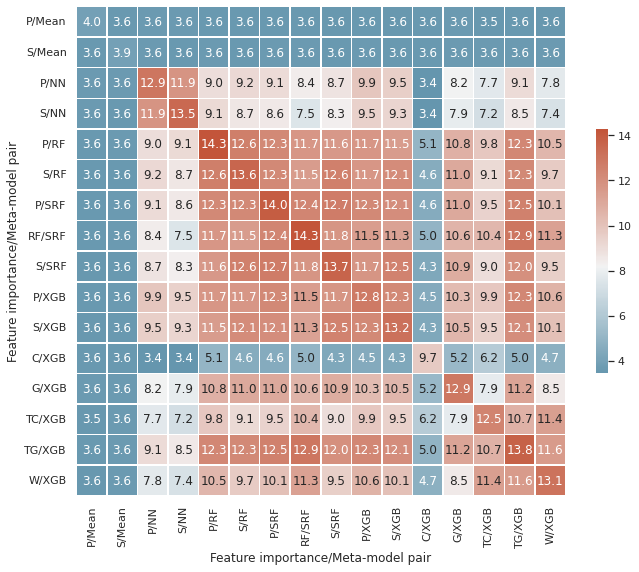

In [28]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

#cdf = sort_corr(cdf)

sns.heatmap(cdf, square=True, cmap=cmap, center=np.mean(X), linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')
plt.xlabel('Feature importance/Meta-model pair')
plt.ylabel('Feature importance/Meta-model pair')
plt.savefig(f'{figures_directory}/feature_agreement_top_15_all.pdf', bbox_inches='tight', pad_inches=0)

In [29]:
cdf.columns

Index(['P/Mean', 'S/Mean', 'P/NN', 'S/NN', 'P/RF', 'S/RF', 'P/SRF', 'RF/SRF',
       'S/SRF', 'P/XGB', 'S/XGB', 'C/XGB', 'G/XGB', 'TC/XGB', 'TG/XGB',
       'W/XGB'],
      dtype='object', name='column2')

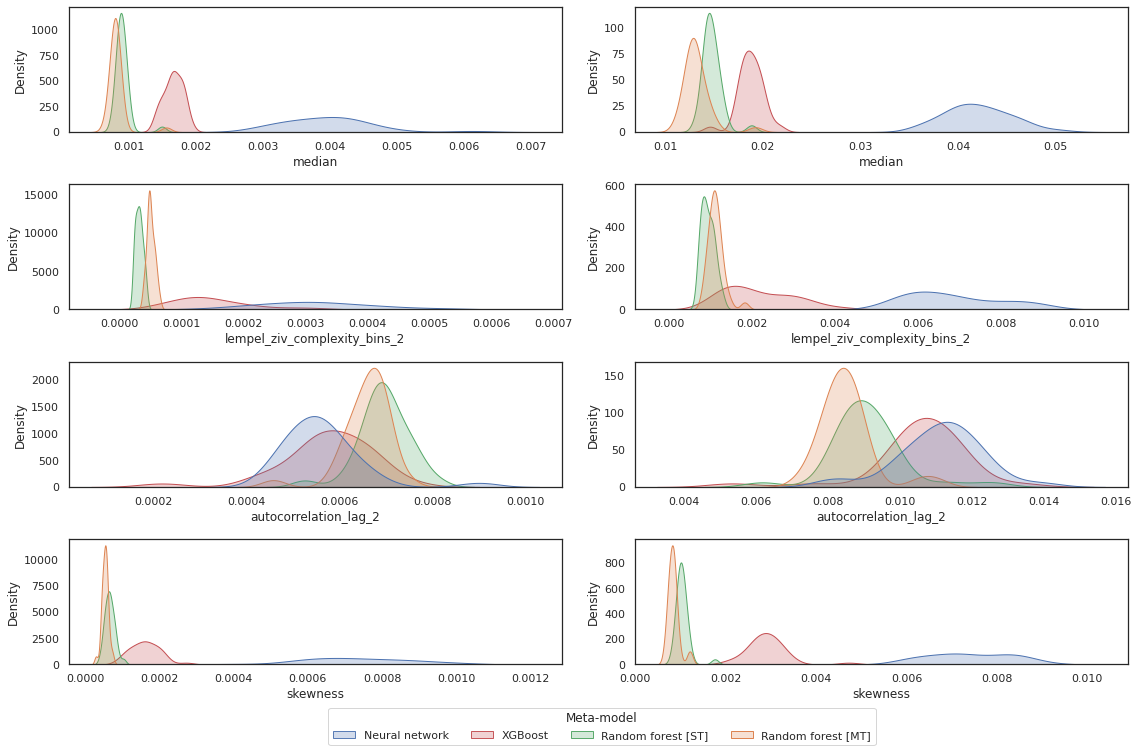

In [30]:
forecasting_algo = 'Theta'

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))

remove_mean_df = df.query(f'ml_algorithm != "M4DummyMeanRegression"')
sdf = remove_mean_df.query(f'feature_importance_method == "permutation" and forecasting_algorithm == "{forecasting_algo}"').sort_values(by="ml_algorithm")
sdf = sdf.rename(columns = get_feature_name_map())

sns.kdeplot(data=sdf, x="median", hue="ml_algorithm", legend=False, ax=ax[0, 0], fill=True)
sns.kdeplot(data=sdf, x="lempel_ziv_complexity_bins_2", hue="ml_algorithm", legend=False, ax=ax[1, 0], fill=True)
sns.kdeplot(data=sdf, x="autocorrelation_lag_2", hue="ml_algorithm", legend=False, ax=ax[2, 0], fill=True)
sns.kdeplot(data=sdf, x="skewness", hue="ml_algorithm", legend=False, ax=ax[3, 0], fill=True)

sdf = remove_mean_df.query(f'feature_importance_method == "shap" and forecasting_algorithm == "{forecasting_algo}"').sort_values(by="ml_algorithm")
sdf = sdf.rename(columns = get_feature_name_map())

sns.kdeplot(data=sdf, x="median", hue="ml_algorithm", legend=False, ax=ax[0, 1], fill=True)
sns.kdeplot(data=sdf, x="lempel_ziv_complexity_bins_2", hue="ml_algorithm", legend=False, ax=ax[1, 1], fill=True)
sns.kdeplot(data=sdf, x="autocorrelation_lag_2", hue="ml_algorithm", legend=False, ax=ax[2, 1], fill=True)
sns.kdeplot(data=sdf, x="skewness", hue="ml_algorithm", legend=False, ax=ax[3, 1], fill=True)


plt.tight_layout()


# Make a legend
maps = get_meta_model_name_map()
import matplotlib.patches as mpatches
p1 = mpatches.Patch(facecolor='#D2DBEB', label='Neural network', edgecolor='#5A7DB6')
p2 = mpatches.Patch(facecolor='#F0D2D3', label='XGBoost', edgecolor='#C7595C')
p3 = mpatches.Patch(facecolor='#D4E9D9', label='Random forest [ST]', edgecolor='#5CAB6E')
p4 = mpatches.Patch(facecolor='#F6E0D3', label='Random forest [MT]', edgecolor='#DD8452')
plt.legend(title='Meta-model', handles=[p1, p2, p3, p4], bbox_to_anchor=(0.5,-0.3), ncol=4)

plt.savefig(f'{figures_directory}/feature_kde_{forecasting_algo}.pdf', bbox_inches='tight', pad_inches=0)

In [31]:
sdf.rename(columns = get_feature_name_map())

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,has_duplicate_max,mean_second_derivative_central,median,length,standard_deviation,skewness,...,energy_ratio_by_chunks_num_segments_10_segment_focus_5,energy_ratio_by_chunks_num_segments_10_segment_focus_6,ratio_beyond_r_sigma_r_0.5,ratio_beyond_r_sigma_r_1,ratio_beyond_r_sigma_r_1.5,ratio_beyond_r_sigma_r_2.5,ratio_beyond_r_sigma_r_3,ratio_beyond_r_sigma_r_6,lempel_ziv_complexity_bins_2,permutation_entropy_dimension_3_tau_1
29199,M4KerasNetRegressionModel,Theta,28,shap,0.000971,0.001959,0.044546,0.005162,0.051837,0.007748,...,0.002972,0.002486,0.002122,0.002291,0.002688,0.002673,0.002197,0.001727,0.006110,0.007632
22624,M4KerasNetRegressionModel,Theta,30,shap,0.000973,0.002127,0.043210,0.005882,0.051854,0.006008,...,0.002668,0.002804,0.002205,0.002027,0.001417,0.001889,0.001398,0.001163,0.006711,0.007583
13970,M4KerasNetRegressionModel,Theta,21,shap,0.000815,0.001954,0.041797,0.005962,0.052950,0.006448,...,0.002662,0.002262,0.002218,0.003011,0.001898,0.002161,0.001471,0.000859,0.007368,0.005105
20956,M4KerasNetRegressionModel,Theta,26,shap,0.000252,0.001332,0.041290,0.007542,0.054734,0.007130,...,0.002855,0.003373,0.001944,0.001811,0.001508,0.002359,0.001720,0.001109,0.007039,0.005564
8335,M4KerasNetRegressionModel,Theta,25,shap,0.000953,0.002255,0.039441,0.006378,0.050196,0.007306,...,0.003669,0.002831,0.002249,0.002503,0.001829,0.002180,0.001690,0.000962,0.005961,0.007697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21808,M4XGBRegressor,Theta,29,shap,0.000328,0.003778,0.018165,0.004098,0.007563,0.002454,...,0.001655,0.002576,0.000720,0.000666,0.000606,0.000642,0.001480,0.000264,0.001460,0.004804
22006,M4XGBRegressor,Theta,6,shap,0.000353,0.004322,0.017789,0.003705,0.008801,0.003096,...,0.001849,0.002768,0.000836,0.000885,0.000866,0.000625,0.001618,0.000378,0.002077,0.003745
7469,M4XGBRegressor,Theta,28,shap,0.000278,0.004417,0.017654,0.003905,0.009016,0.003153,...,0.001361,0.002364,0.000677,0.000903,0.000728,0.000847,0.000957,0.000364,0.001402,0.004909
24429,M4XGBRegressor,Theta,27,shap,0.000436,0.003692,0.018994,0.003939,0.006393,0.002495,...,0.001665,0.002592,0.000634,0.000953,0.000837,0.000989,0.000817,0.000401,0.002759,0.004585
